# Подключение модулей

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

In [2]:
%matplotlib inline

### Загрузка данных

In [3]:
df = pd.read_csv("diamonds.csv", low_memory=False)

In [4]:
df.head(10)

,Shape,Cut,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Culet,Length,Width,Height,Price,Type,Fluorescence
0,Cushion Modified,Ideal,F,VVS2,1.84,1.02,65.8,59.0,Excellent,Very Good,Medium to Thick,NaN,7.09,6.95,4.57,2640,GIA Lab-Grown,NaN
1,Pear,NaN,E,VS1,1.20,1.65,62.5,58.0,Very Good,Very Good,Medium to Thick,NaN,9.64,5.86,3.66,1070,GIA Lab-Grown,NaN
2,Oval,NaN,E,VS1,1.19,1.41,63.1,63.0,Very Good,Very Good,Medium to Thick,NaN,8.44,6.00,3.79,1070,GIA Lab-Grown,NaN
3,Heart,NaN,D,IF,1.00,1.18,61.7,58.0,Excellent,Excellent,Slightly Thick to Very Thick,NaN,5.85,6.89,4.25,7110,GIA,Faint
4,Radiant,NaN,H,VS1,1.01,1.35,69.4,66.0,Excellent,Very Good,Thick,NaN,6.80,5.05,3.50,3050,GIA,NaN
5,Oval,NaN,E,VVS2,1.00,1.45,59.8,57.0,Excellent,Very Good,Slightly Thick to Thick,NaN,8.19,5.63,3.36,4660,GIA,Faint
6,Marquise,NaN,E,VS1,1.10,2.02,61.4,61.0,Excellent,Excellent,Medium to Slightly Thick,Pointed,11.01,5.46,3.35,1100,IGI Lab-Grown,NaN
7,Heart,NaN,F,VS1,7.54,1.12,55.6,58.0,Excellent,Excellent,Medium to Slightly Thick,NaN,12.32,13.83,7.69,16910,GIA Lab-Grown,NaN
8,Oval,NaN,G,VS2,1.01,1.40,63.0,63.0,Excellent,Very Good,Medium to Very Thick,NaN,7.89,5.64,3.55,4480,GIA,NaN
9,Heart,NaN,E,VVS1,1.75,1.15,58.7,57.0,Excellent,Excellent,Medium to Very Thick,NaN,7.30,8.40,4.93,3540,GIA Lab-Grown,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6485 entries, 0 to 6484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shape               6480 non-null   object 
 1   Cut                 2182 non-null   object 
 2   Color               6480 non-null   object 
 3   Clarity             6480 non-null   object 
 4   Carat Weight        6480 non-null   float64
 5   Length/Width Ratio  6480 non-null   float64
 6   Depth %             6478 non-null   float64
 7   Table %             6468 non-null   float64
 8   Polish              6465 non-null   object 
 9   Symmetry            6465 non-null   object 
 10  Girdle              6463 non-null   object 
 11  Culet               1891 non-null   object 
 12  Length              6465 non-null   float64
 13  Width               6465 non-null   float64
 14  Height              6465 non-null   float64
 15  Price               6485 non-null   int64  
 16  Type  

In [6]:
df.shape

(6485, 18)

##### Размер набора данных: 6,485 наблюдений, 18 признаков

In [7]:
df.describe()

,Carat Weight,Length/Width Ratio,Depth %,Table %,Length,Width,Height,Price
count,6480.000000,6480.000000,6478.000000,6468.000000,6465.000000,6465.000000,6465.000000,6485.000000
mean,1.235772,1.329548,64.206499,61.828541,7.663595,6.098323,3.885708,3529.391365
std,0.506647,0.325707,4.773192,4.760197,1.674665,1.151152,0.599420,3280.439167
min,1.000000,1.000000,46.100000,51.000000,5.180000,4.420000,2.670000,1010.000000
25%,1.010000,1.020000,61.200000,58.000000,6.330000,5.390000,3.460000,1210.000000
50%,1.030000,1.270000,63.100000,61.000000,7.420000,5.640000,3.670000,3320.000000
75%,1.200000,1.510000,67.600000,65.000000,8.660000,6.610000,4.100000,4390.000000
max,9.380000,2.580000,77.000000,78.000000,15.210000,14.880000,8.170000,39460.000000


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Carat Weight,6480.0,1.235772,0.506647,1.00,1.01,1.03,1.20,9.38
Length/Width Ratio,6480.0,1.329548,0.325707,1.00,1.02,1.27,1.51,2.58
Depth %,6478.0,64.206499,4.773192,46.10,61.20,63.10,67.60,77.00
Table %,6468.0,61.828541,4.760197,51.00,58.00,61.00,65.00,78.00
Length,6465.0,7.663595,1.674665,5.18,6.33,7.42,8.66,15.21
Width,6465.0,6.098323,1.151152,4.42,5.39,5.64,6.61,14.88
Height,6465.0,3.885708,0.599420,2.67,3.46,3.67,4.10,8.17
Price,6485.0,3529.391365,3280.439167,1010.00,1210.00,3320.00,4390.00,39460.00


### Описание данных

##### Признаки:
- **Shape** - Геометрическая форма бриллианта.
- **Cut** - Класс качества огранки бриллианта.
- **Color** - оценка цвета бриллианта от D до H.
- **Clarity** - Оценка чистоты по наличию дефектов.
- **Carat Weight** - Вес бриллианта в каратах.
- **Length/Width Ratio** - Пропорция длины к ширине.
- **Depth %** - Глубина бриллианта в процентах от его ширины.
- **Table %** - Ширина верхней грани в процентах.
- **Polish** - Качество обработки поверхности бриллианта.
- **Symmetry** - Точность формы бриллианта.
- **Girdle** - толщина грани бриллианта.
- **Culet** - размер нижней грани.
- **Length** - Длина бриллианта в миллиметрах.
- **Width** - ширина бриллианта в миллиметрах.
- **Height** - Высота бриллианта в миллиметрах.
- **Price** - Цена бриллианта в долларах США ($).
- **Type** - Сертификация или тип происхождения бриллианта.
- **Fluorescence** - Уровень ультрафиолетовой флуоресценции бриллианта.

In [9]:
df.info(max_cols=30, verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6485 entries, 0 to 6484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shape               6480 non-null   object 
 1   Cut                 2182 non-null   object 
 2   Color               6480 non-null   object 
 3   Clarity             6480 non-null   object 
 4   Carat Weight        6480 non-null   float64
 5   Length/Width Ratio  6480 non-null   float64
 6   Depth %             6478 non-null   float64
 7   Table %             6468 non-null   float64
 8   Polish              6465 non-null   object 
 9   Symmetry            6465 non-null   object 
 10  Girdle              6463 non-null   object 
 11  Culet               1891 non-null   object 
 12  Length              6465 non-null   float64
 13  Width               6465 non-null   float64
 14  Height              6465 non-null   float64
 15  Price               6485 non-null   int64  
 16  Type  

In [10]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Shape,6480,11,Round,888,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cut,2182,4,Ideal,1310,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color,6480,5,E,1884,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Clarity,6480,6,VS1,3337,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Carat Weight,6480.0,NaN,NaN,NaN,1.235772,0.506647,1.0,1.01,1.03,1.2,9.38
Length/Width Ratio,6480.0,NaN,NaN,NaN,1.329548,0.325707,1.0,1.02,1.27,1.51,2.58
Depth %,6478.0,NaN,NaN,NaN,64.206499,4.773192,46.1,61.2,63.1,67.6,77.0
Table %,6468.0,NaN,NaN,NaN,61.828541,4.760197,51.0,58.0,61.0,65.0,78.0
Polish,6465,3,Excellent,5939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Symmetry,6465,3,Excellent,4551,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.duplicated().sum()

np.int64(3)

In [12]:
df.isna().sum()

Shape                    5
Cut                   4303
Color                    5
Clarity                  5
Carat Weight             5
Length/Width Ratio       5
Depth %                  7
Table %                 17
Polish                  20
Symmetry                20
Girdle                  22
Culet                 4594
Length                  20
Width                   20
Height                  20
Price                    0
Type                     0
Fluorescence          5264
dtype: int64

##### Вывод

Поля, в которых есть пропущенные значения: Shape, Cut, Color, Clarity, Carat Weight, Length/Width Ratio, Depth %, Table %, Polish, Symmetry, Girdle, Culet, Length, Width, Height, Fluorescence.

# Визуализация данных

In [13]:
num_columns = df.select_dtypes(include=[np.number]).columns
num_columns = num_columns.drop(["Length/Width Ratio", "Depth %", "Table %"])

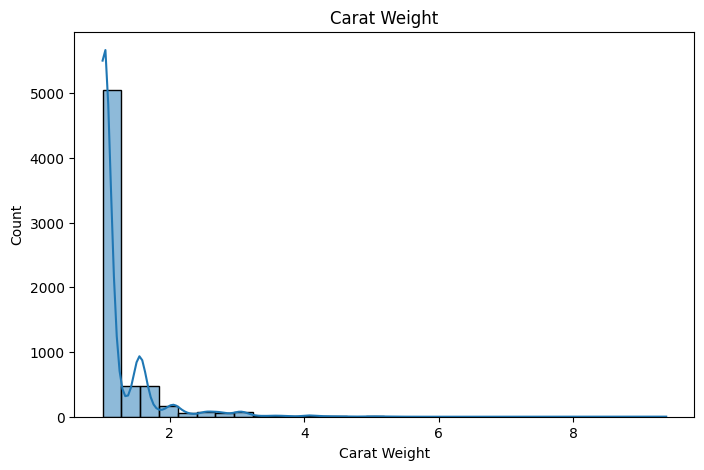

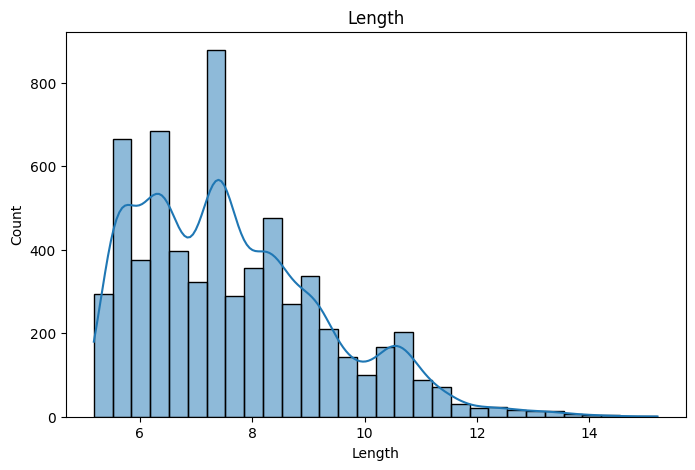

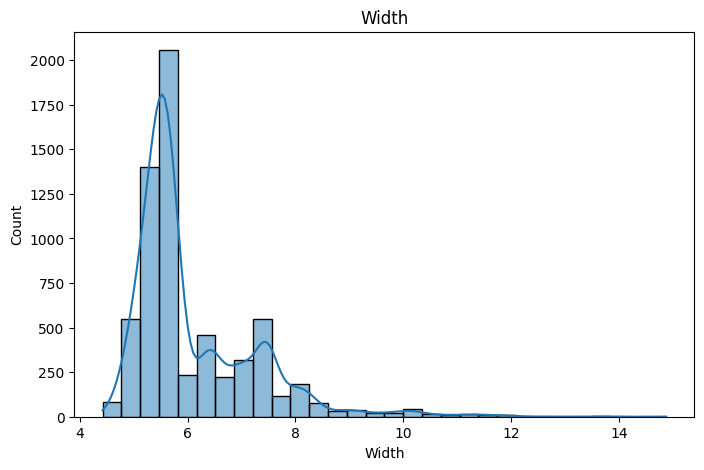

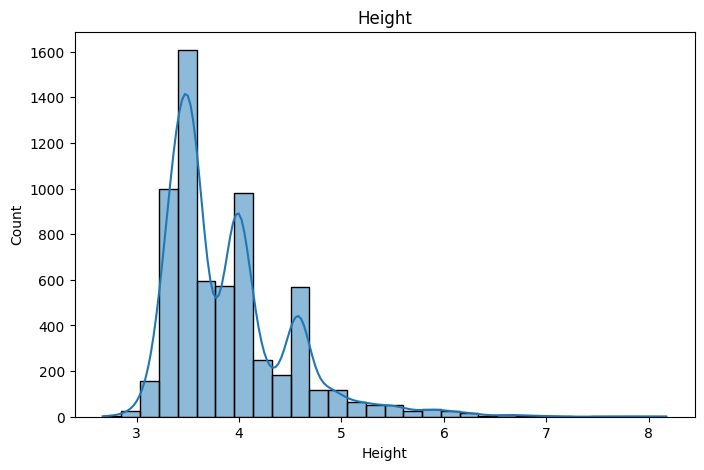

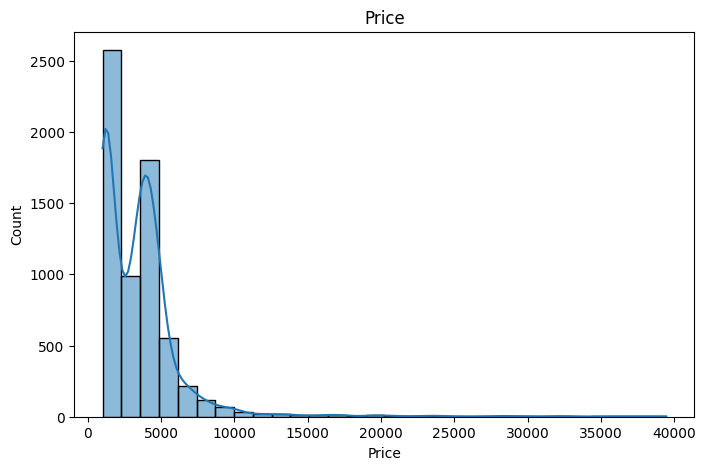

In [14]:
for col in num_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
    plt.show()

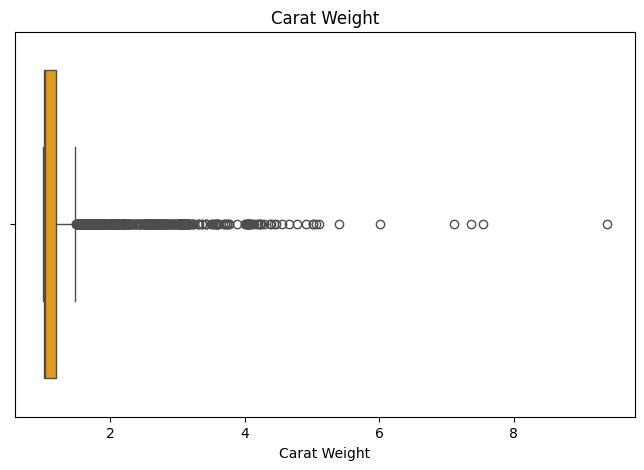

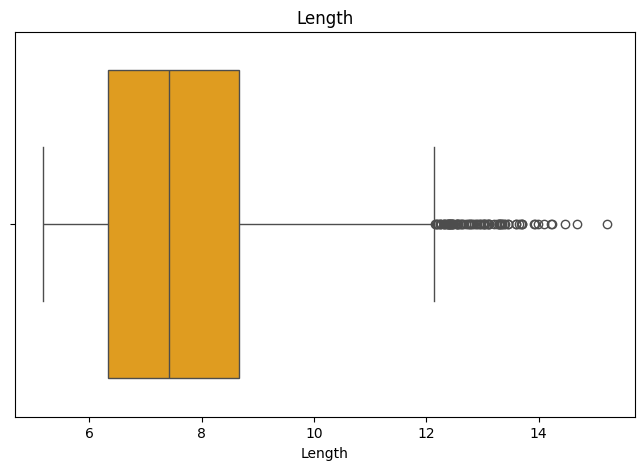

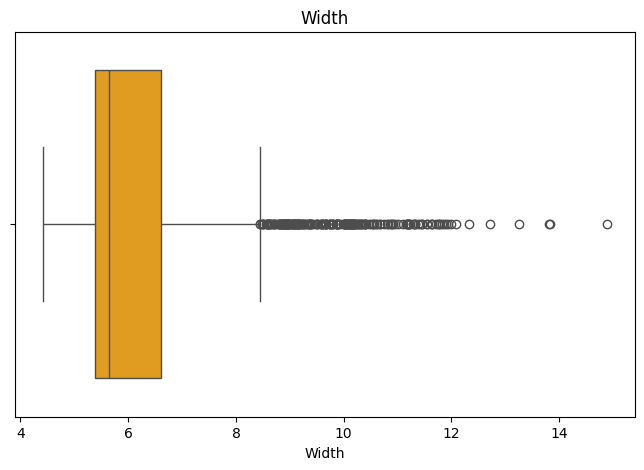

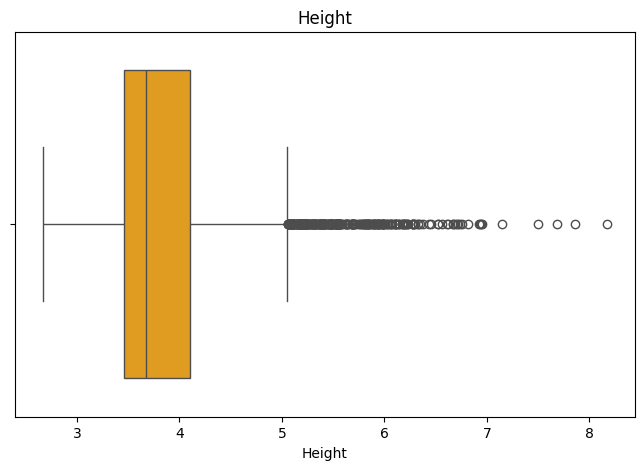

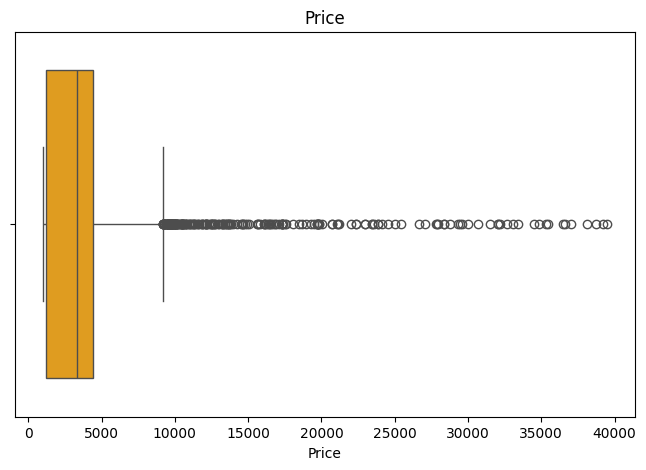

In [15]:
for col in num_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col], color="orange")
    plt.title(col)
    plt.show()

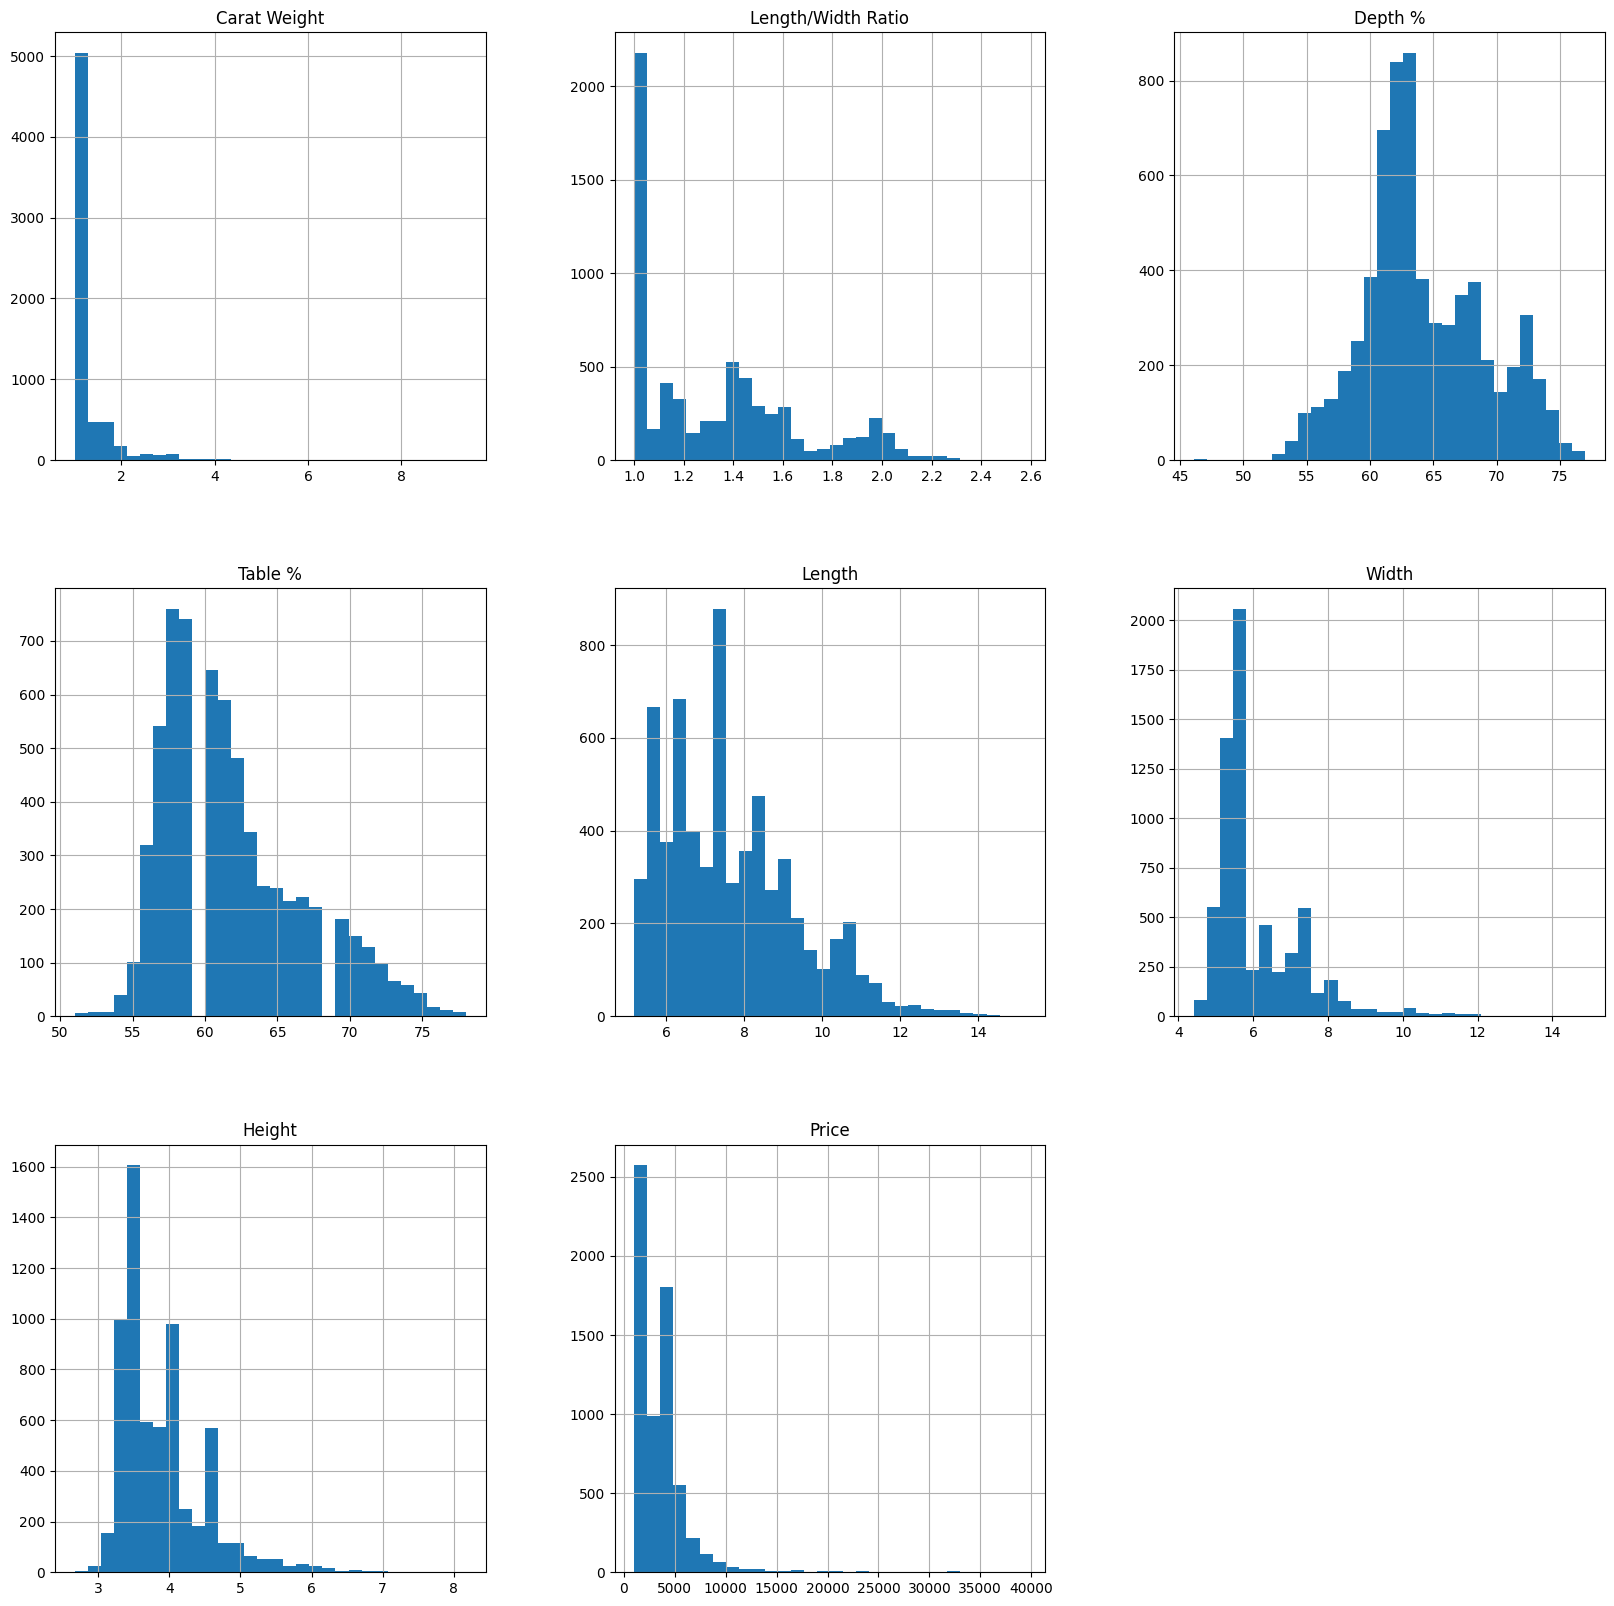

In [16]:
df.hist(figsize=(20,20), bins=30);

Shape
Round               888
Pear                840
Marquise            835
Princess            833
Oval                828
Heart               827
Radiant             801
Cushion Modified    365
Emerald             137
Cushion              91
Square Radiant       35
Name: count, dtype: int64


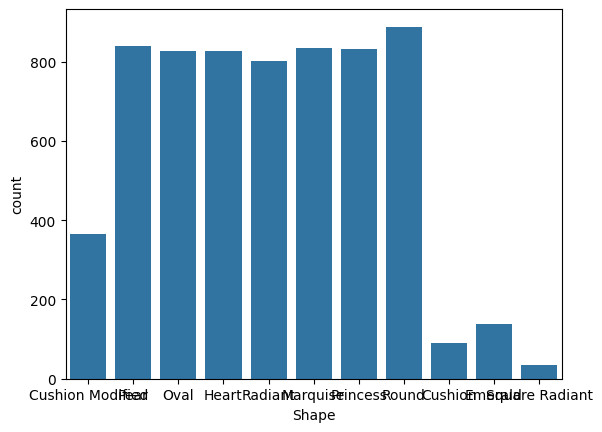

Color
E    1884
D    1772
H    1117
F     969
G     738
Name: count, dtype: int64


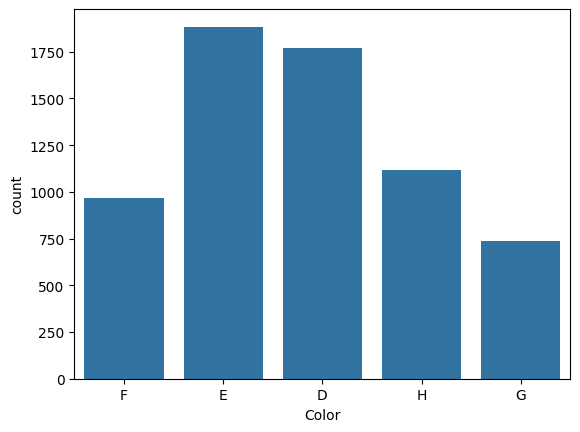

Clarity
VS1     3337
VS2     1433
VVS2    1061
VVS1     480
IF       163
FL         6
Name: count, dtype: int64


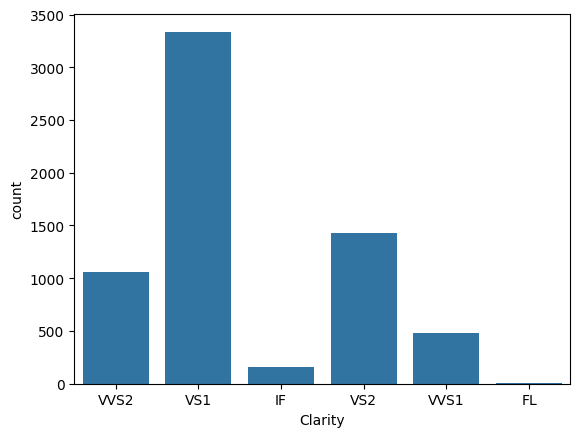

Polish
Excellent    5939
Very Good     492
Good           34
Name: count, dtype: int64


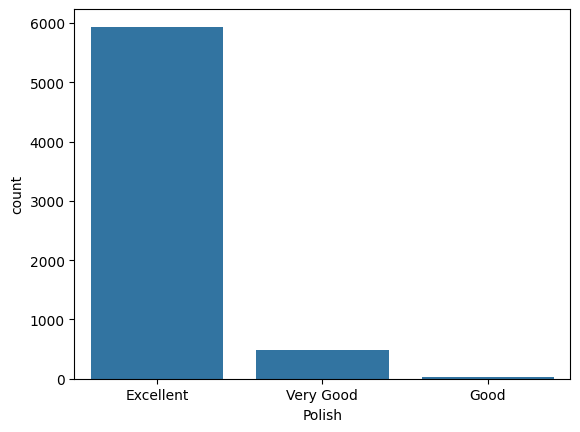

Symmetry
Excellent    4551
Very Good    1790
Good          124
Name: count, dtype: int64


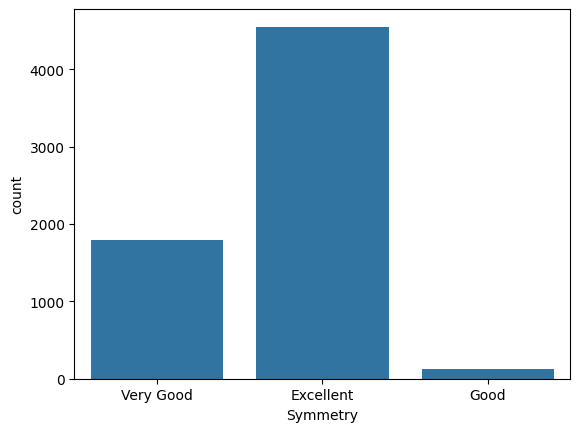

Type
GIA              3355
IGI Lab-Grown    1876
GIA Lab-Grown    1254
Name: count, dtype: int64


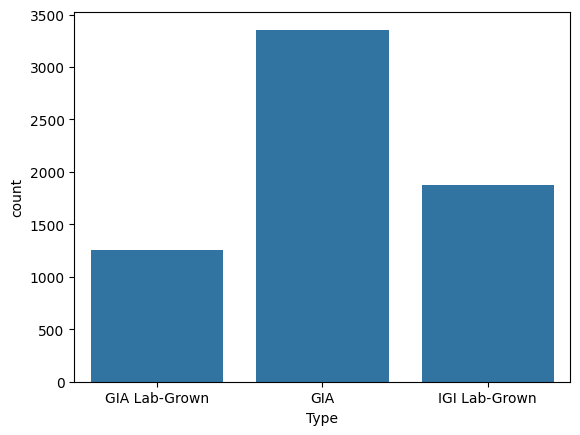

In [17]:

for cat in df[["Shape", "Color", "Clarity", "Polish", "Symmetry", "Type"]]:
    print(df[cat].value_counts())
    sns.countplot(x=cat, data=df[["Shape", "Color", "Clarity", "Polish", "Symmetry", "Type"]])
    plt.show()

<Figure size 1200x1000 with 0 Axes>

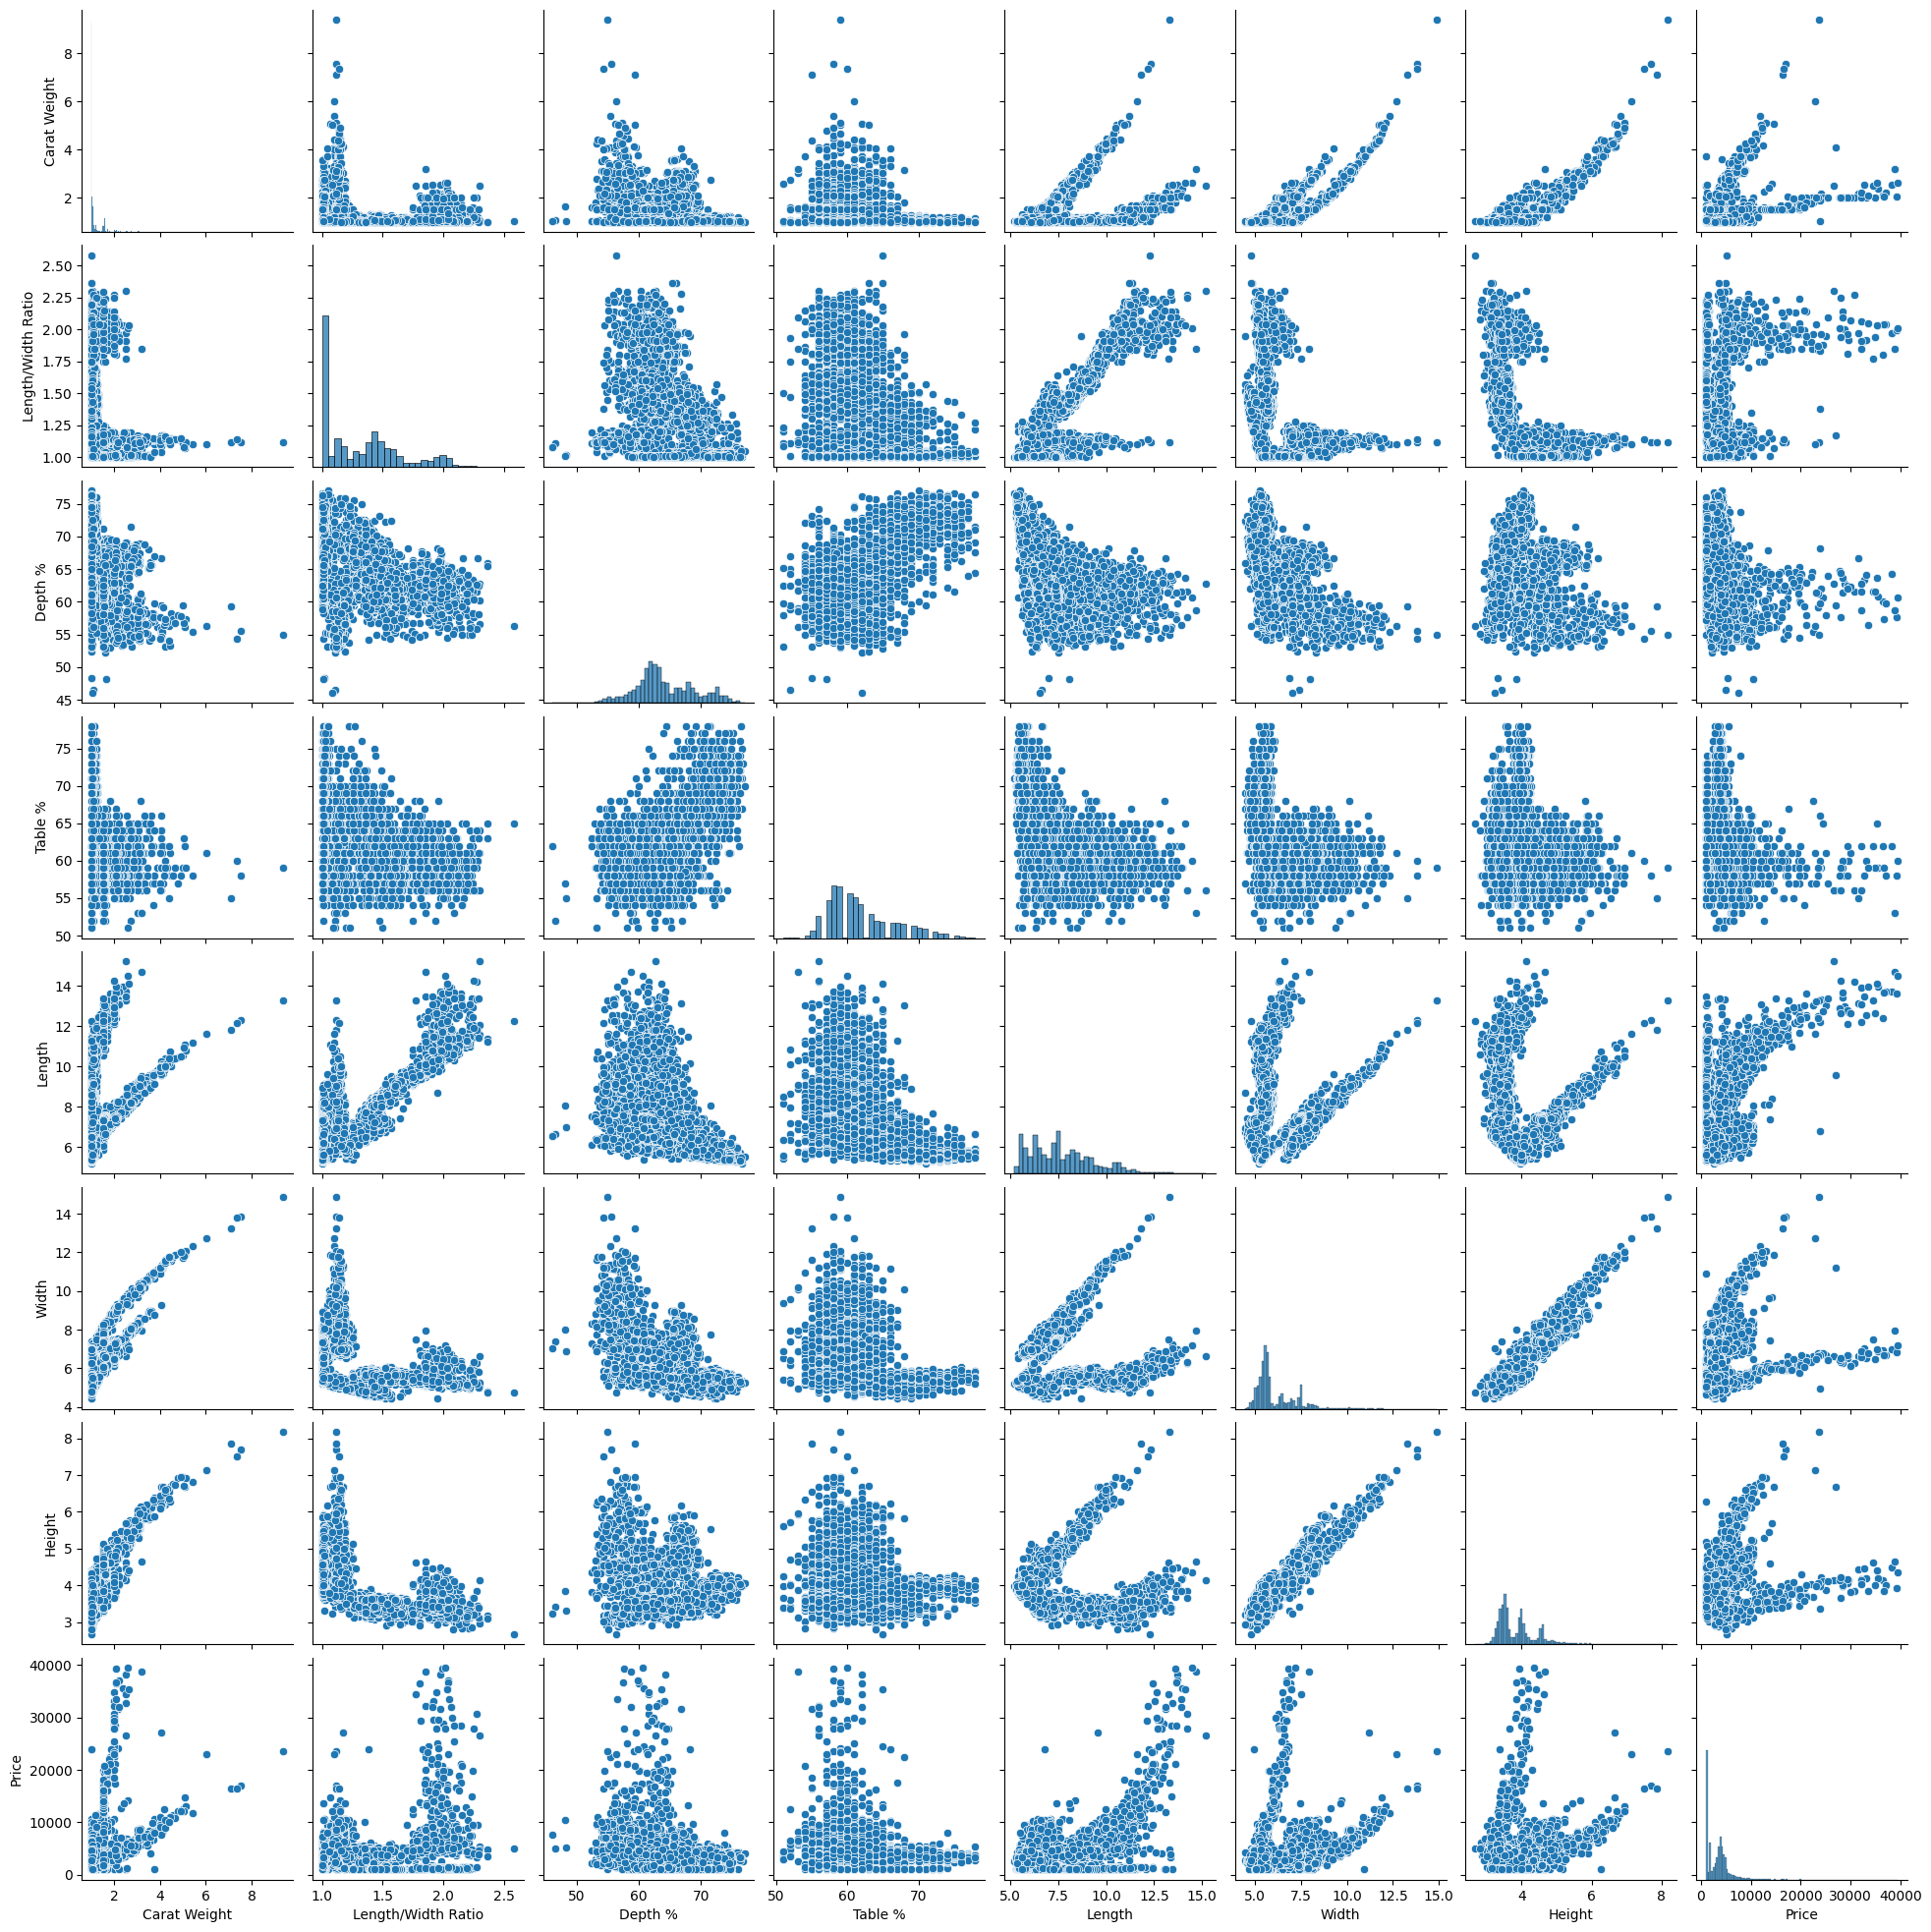

In [18]:
plt.figure(figsize=(12,10))
sns.pairplot(df)

In [19]:
corr = df.select_dtypes(include=[np.number]).corr()
corr

,Carat Weight,Length/Width Ratio,Depth %,Table %,Length,Width,Height,Price
Carat Weight,1.000000,-0.214103,-0.243091,-0.163627,0.225236,0.820909,0.834541,0.368740
Length/Width Ratio,-0.214103,1.000000,-0.276464,-0.257453,0.856331,-0.421054,-0.613154,0.151824
Depth %,-0.243091,-0.276464,1.000000,0.685472,-0.497853,-0.514722,-0.134651,-0.183591
Table %,-0.163627,-0.257453,0.685472,1.000000,-0.457089,-0.352839,-0.112815,-0.098264
Length,0.225236,0.856331,-0.497853,-0.457089,1.000000,0.015194,-0.201180,0.314879
Width,0.820909,-0.421054,-0.514722,-0.352839,0.015194,1.000000,0.915727,0.261252
Height,0.834541,-0.613154,-0.134651,-0.112815,-0.201180,0.915727,1.000000,0.217995
Price,0.368740,0.151824,-0.183591,-0.098264,0.314879,0.261252,0.217995,1.000000


<Axes: >

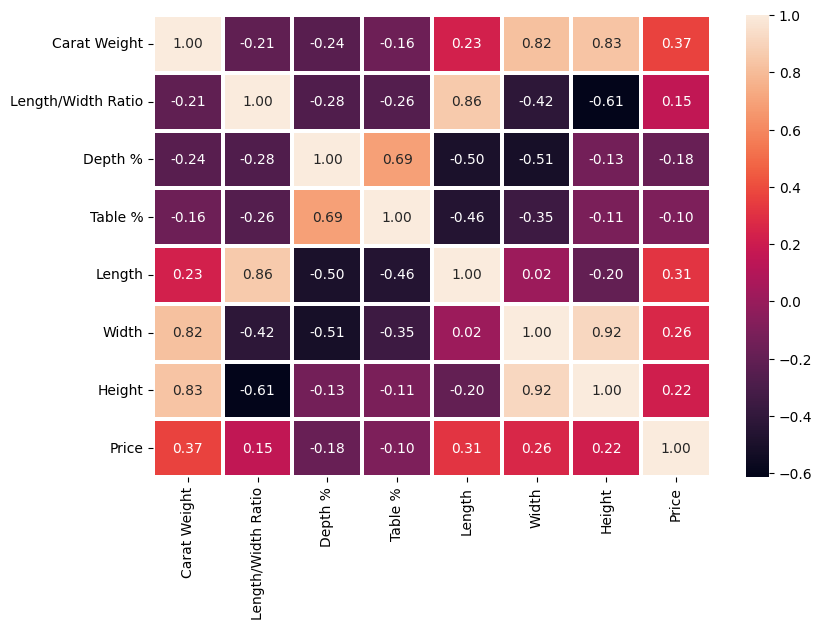

In [20]:
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)

Тепловая карта отображает корреляцию между высотой и широтой, и весом алмаза. Так же, можно увидеть корреляцию между Table % и Depth %

In [21]:
traindf = df
traindf.drop(columns=['Culet', 'Cut', 'Fluorescence', 'Length/Width Ratio'], inplace=True)

In [22]:
traindf["Shape"] = traindf["Shape"].fillna(traindf["Shape"].mode()[0])

In [23]:
traindf["Color"] = traindf["Color"].fillna(traindf["Color"].mode()[0])

In [24]:
traindf["Clarity"] = traindf["Clarity"].fillna(traindf["Clarity"].mode()[0])

In [25]:
traindf["Carat Weight"] = traindf["Carat Weight"].fillna(traindf["Carat Weight"].mode()[0])

Создание модели

In [26]:
X = traindf.drop('Price',axis=1)
y = traindf['Price']

In [27]:
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

##### KNeighboursClassifier

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

(4344, 13) (2141, 13) (4344,) (2141,)


KNeighborsClassifier()

In [29]:
%matplotlib inline

In [30]:
knn_predict = knn.predict(X_test)
knn_predict

array([4170, 1090, 3160, ..., 4010, 2720, 3600])

In [31]:
knn_pred_test = knn.predict(X_test)
display(knn_pred_test[:20], np.array(y_test[:20]))

array([4170, 1090, 3160, 3990, 1800, 2980, 1030, 1080, 1120, 8490, 1860,
       1470, 1070, 1040, 1100, 1020, 3930, 2900, 4260, 1050])

array([ 4570,  1170,  3930,  4890,  1930,  4120,  1080,  2170,  3830,
       12460,  4080,  6880,  2930,  1080,  4180,  3930,  6610,  3640,
        6600,  1150])

In [32]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.23779926335174953
test accuracy:  0.031760859411489956


In [33]:
knn_accuracy = accuracy_score(y_test, y_test_predict, normalize=True)
knn_accuracy

0.031760859411489956

In [34]:
lr = RandomForestClassifier()
lr.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
%matplotlib inline

In [36]:
lr_predict = lr.predict(X_test)
lr_predict

array([4700, 1170, 3930, ..., 6960, 3690, 1190])

In [37]:
lr_pred_test = lr.predict(X_test)
display(lr_pred_test[:20], np.array(y_test[:20]))

array([ 4700,  1170,  3930,  4040,  2100,  3280,  1070,  2770,  4010,
       10470,  3770,  4070,  4820,  1040,  1100,  4700,  4820,  4400,
        7050,  1190])

array([ 4570,  1170,  3930,  4890,  1930,  4120,  1080,  2170,  3830,
       12460,  4080,  6880,  2930,  1080,  4180,  3930,  6610,  3640,
        6600,  1150])

In [ ]:
y_train_predict = lr.predict(X_train)
y_test_predict = lr.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

In [38]:
lr_accuracy = accuracy_score(y_test, y_test_predict, normalize=True)
lr_accuracy

0.031760859411489956